# DC-TSS Example with Sports 

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import os
import csv
from scipy import stats as st
from utils import *

import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets


import numpy as np
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from torch.autograd import Variable
import math
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance
from TS_DEC import *
#from TS_DEC_Linear import *


from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cosine as cosine_distance
from typing import Optional, List
from scipy.io import arff

from scipy.signal import find_peaks, peak_prominences


import warnings
warnings.filterwarnings("ignore")

## Set Parameters

In [16]:
# Hyper parameters for Neural Network
epochs1 = 1200
epochs2 = 8000
lr=0.1
pre_lr = 1.5e-3
layers = [6,4,4]
strides = [2,2,2]
batch_size = 1500

# DC-TSS hyper-parameters
window_length = 25
overlap_percent = 0.2
n_clusters = 100
window_length2 = 200



## Read Dataset

In [8]:
#selected_songs = [2,140,30056,30058,85594,120308,120194,120112,120105]
time_series = np.loadtxt("./data/Sports_Activity.csv", delimiter=",")
labels = np.loadtxt("./data/Sports_Activity_labels.csv", delimiter=",")
ground_truth = np.where(labels[:-1] != labels[1:])[0]


## Subsequence TS

In [9]:
start = 0
subsequences = []
subsequence_labels = []

while start+window_length < len(time_series[0]):
    subsequence_labels.append(st.mode(labels[start:start+window_length])[0][0])    
    subsequence = time_series[:,start:start+window_length]
    start = start+window_length - int(overlap_percent*window_length)
    subsequences.append(subsequence)
    subsequences.append(np.roll(subsequence, -(window_length)//4))
    subsequences.append(np.roll(subsequence, (window_length)//4))
    subsequences.append(np.roll(subsequence, (window_length)//2))

subsequences = np.asarray(subsequences)
subsequence_labels = np.asarray(subsequence_labels)

## Set Data_loader for Neural Network?

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


data_loader = get_dataloader(data=subsequences,
                          shuffle=False,
                          batch_size=batch_size,
                          num_workers=1,
                          data_transforms=None)
torch.cuda.empty_cache()
input_shape = subsequences.shape
#torch.cuda.memory_summary(device=None, abbreviated=False)



cuda


## Create DC-TSS model

In [11]:
deep_cluster_model = DEC(n_clusters = n_clusters, input_shape=input_shape,k_sizes=layers,strides=strides)
deep_cluster_model.to(device)


DEC(
  (AE): Autoencoder(
    (encoder): Sequential(
      (0): Conv1d(45, 45, kernel_size=(6,), stride=(2,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(45, 45, kernel_size=(4,), stride=(2,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): Conv1d(45, 45, kernel_size=(4,), stride=(2,))
    )
    (decoder): Sequential(
      (0): ConvTranspose1d(45, 45, kernel_size=(4,), stride=(2,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): ConvTranspose1d(45, 45, kernel_size=(4,), stride=(2,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): ConvTranspose1d(45, 45, kernel_size=(6,), stride=(2,))
      (5): LeakyReLU(negative_slope=0.1)
      (6): Upsample(size=25, mode=nearest)
    )
  )
  (clustlayer): clustering()
  (model): Sequential(
    (0): Sequential(
      (0): Conv1d(45, 45, kernel_size=(6,), stride=(2,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(45, 45, kernel_size=(4,), stride=(2,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): Conv1d(

## Phase 1: Initialize Latent Space Mapping with 1DCNN AE

In [12]:
pretraining(model=deep_cluster_model, dbgenerator=data_loader, batch_size=batch_size, epochs=epochs1,lr=pre_lr)


epoch 1,loss = 1.00401402
epoch 2,loss = 1.00374973
epoch 3,loss = 1.00344181
epoch 4,loss = 1.00301957
epoch 5,loss = 1.00239527
epoch 6,loss = 1.00140738
epoch 7,loss = 0.99966824
epoch 8,loss = 0.99663216
epoch 9,loss = 0.99172896
epoch 10,loss = 0.98458433
epoch 11,loss = 0.97632462
epoch 12,loss = 0.97155499
epoch 13,loss = 0.96967816
epoch 14,loss = 0.96289599
epoch 15,loss = 0.95656681
epoch 16,loss = 0.95351690
epoch 17,loss = 0.95184314
epoch 18,loss = 0.94979101
epoch 19,loss = 0.94736797
epoch 20,loss = 0.94546217
epoch 21,loss = 0.94416255
epoch 22,loss = 0.94197160
epoch 23,loss = 0.93918055
epoch 24,loss = 0.93704593
epoch 25,loss = 0.93519682
epoch 26,loss = 0.93294734
epoch 27,loss = 0.93052816
epoch 28,loss = 0.92851239
epoch 29,loss = 0.92646593
epoch 30,loss = 0.92398161
epoch 31,loss = 0.92157066
epoch 32,loss = 0.91921866
epoch 33,loss = 0.91663283
epoch 34,loss = 0.91402596
epoch 35,loss = 0.91128027
epoch 36,loss = 0.90832645
epoch 37,loss = 0.90561402
epoch 38,l

epoch 298,loss = 0.54573447
epoch 299,loss = 0.54541671
epoch 300,loss = 0.54497617
epoch 301,loss = 0.54447639
epoch 302,loss = 0.54392552
epoch 303,loss = 0.54343450
epoch 304,loss = 0.54300207
epoch 305,loss = 0.54259050
epoch 306,loss = 0.54216111
epoch 307,loss = 0.54170525
epoch 308,loss = 0.54128963
epoch 309,loss = 0.54085755
epoch 310,loss = 0.54043818
epoch 311,loss = 0.53999895
epoch 312,loss = 0.53960705
epoch 313,loss = 0.53926712
epoch 314,loss = 0.53893995
epoch 315,loss = 0.53863680
epoch 316,loss = 0.53841418
epoch 317,loss = 0.53825742
epoch 318,loss = 0.53824097
epoch 319,loss = 0.53791910
epoch 320,loss = 0.53731090
epoch 321,loss = 0.53630877
epoch 322,loss = 0.53563190
epoch 323,loss = 0.53544670
epoch 324,loss = 0.53532374
epoch 325,loss = 0.53507996
epoch 326,loss = 0.53433102
epoch 327,loss = 0.53373754
epoch 328,loss = 0.53350294
epoch 329,loss = 0.53332990
epoch 330,loss = 0.53302014
epoch 331,loss = 0.53235465
epoch 332,loss = 0.53185189
epoch 333,loss = 0.5

epoch 591,loss = 0.48179635
epoch 592,loss = 0.48194966
epoch 593,loss = 0.48216239
epoch 594,loss = 0.48217809
epoch 595,loss = 0.48179516
epoch 596,loss = 0.48114660
epoch 597,loss = 0.48060584
epoch 598,loss = 0.48050183
epoch 599,loss = 0.48067522
epoch 600,loss = 0.48071882
epoch 601,loss = 0.48053038
epoch 602,loss = 0.48020425
epoch 603,loss = 0.47994173
epoch 604,loss = 0.47980481
epoch 605,loss = 0.47971115
epoch 606,loss = 0.47965083
epoch 607,loss = 0.47960296
epoch 608,loss = 0.47945243
epoch 609,loss = 0.47921741
epoch 610,loss = 0.47897571
epoch 611,loss = 0.47884607
epoch 612,loss = 0.47882456
epoch 613,loss = 0.47879791
epoch 614,loss = 0.47869298
epoch 615,loss = 0.47848725
epoch 616,loss = 0.47828436
epoch 617,loss = 0.47814369
epoch 618,loss = 0.47806650
epoch 619,loss = 0.47800371
epoch 620,loss = 0.47791907
epoch 621,loss = 0.47781390
epoch 622,loss = 0.47771564
epoch 623,loss = 0.47765309
epoch 624,loss = 0.47765255
epoch 625,loss = 0.47771627
epoch 626,loss = 0.4

epoch 884,loss = 0.45835415
epoch 885,loss = 0.45815939
epoch 886,loss = 0.45796356
epoch 887,loss = 0.45773745
epoch 888,loss = 0.45759994
epoch 889,loss = 0.45755634
epoch 890,loss = 0.45760036
epoch 891,loss = 0.45767388
epoch 892,loss = 0.45770693
epoch 893,loss = 0.45771500
epoch 894,loss = 0.45767292
epoch 895,loss = 0.45769015
epoch 896,loss = 0.45772353
epoch 897,loss = 0.45767286
epoch 898,loss = 0.45749196
epoch 899,loss = 0.45724460
epoch 900,loss = 0.45706108
epoch 901,loss = 0.45703804
epoch 902,loss = 0.45710516
epoch 903,loss = 0.45716169
epoch 904,loss = 0.45714504
epoch 905,loss = 0.45706373
epoch 906,loss = 0.45699957
epoch 907,loss = 0.45688209
epoch 908,loss = 0.45685709
epoch 909,loss = 0.45670998
epoch 910,loss = 0.45661643
epoch 911,loss = 0.45655608
epoch 912,loss = 0.45661935
epoch 913,loss = 0.45676896
epoch 914,loss = 0.45682308
epoch 915,loss = 0.45676586
epoch 916,loss = 0.45654693
epoch 917,loss = 0.45636231
epoch 918,loss = 0.45631829
epoch 919,loss = 0.4

epoch 1171,loss = 0.44535869
epoch 1172,loss = 0.44537929
epoch 1173,loss = 0.44538277
epoch 1174,loss = 0.44522706
epoch 1175,loss = 0.44509575
epoch 1176,loss = 0.44497013
epoch 1177,loss = 0.44490203
epoch 1178,loss = 0.44483876
epoch 1179,loss = 0.44477642
epoch 1180,loss = 0.44475615
epoch 1181,loss = 0.44477358
epoch 1182,loss = 0.44480258
epoch 1183,loss = 0.44482294
epoch 1184,loss = 0.44464618
epoch 1185,loss = 0.44451937
epoch 1186,loss = 0.44446114
epoch 1187,loss = 0.44454694
epoch 1188,loss = 0.44470531
epoch 1189,loss = 0.44479898
epoch 1190,loss = 0.44477370
epoch 1191,loss = 0.44465658
epoch 1192,loss = 0.44455993
epoch 1193,loss = 0.44454783
epoch 1194,loss = 0.44448370
epoch 1195,loss = 0.44439891
epoch 1196,loss = 0.44423944
epoch 1197,loss = 0.44413534
epoch 1198,loss = 0.44409305
epoch 1199,loss = 0.44405743
epoch 1200,loss = 0.44405094


In [13]:
torch.save(deep_cluster_model.state_dict(), './Sports_pretrain.pth')

In [26]:
deep_cluster_model = DEC(n_clusters = n_clusters, input_shape=input_shape,k_sizes=layers,strides=strides)
deep_cluster_model.load_state_dict(torch.load('./Sports_pretrain.pth'))
deep_cluster_model.to(device)

DEC(
  (AE): Autoencoder(
    (encoder): Sequential(
      (0): Conv1d(45, 45, kernel_size=(6,), stride=(2,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(45, 45, kernel_size=(4,), stride=(2,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): Conv1d(45, 45, kernel_size=(4,), stride=(2,))
    )
    (decoder): Sequential(
      (0): ConvTranspose1d(45, 45, kernel_size=(4,), stride=(2,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): ConvTranspose1d(45, 45, kernel_size=(4,), stride=(2,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): ConvTranspose1d(45, 45, kernel_size=(6,), stride=(2,))
      (5): LeakyReLU(negative_slope=0.1)
      (6): Upsample(size=25, mode=nearest)
    )
  )
  (clustlayer): clustering()
  (model): Sequential(
    (0): Sequential(
      (0): Conv1d(45, 45, kernel_size=(6,), stride=(2,))
      (1): LeakyReLU(negative_slope=0.1)
      (2): Conv1d(45, 45, kernel_size=(4,), stride=(2,))
      (3): LeakyReLU(negative_slope=0.1)
      (4): Conv1d(

## Phase 2: Refine Latent Space and Find Clusters

In [27]:
# Refine on nonagumented subsequences (no np.roll())
start = 0
subsequences = []
subsequence_labels = []

while start+window_length < len(time_series[0]):
    subsequence_labels.append(st.mode(labels[start:start+window_length])[0][0])    
    subsequence = time_series[:,start:start+window_length]
    start = start+window_length - int(overlap_percent*window_length)
    subsequences.append(subsequence)
    

subsequences = np.asarray(subsequences)
subsequence_labels = np.asarray(subsequence_labels)
batch_size = subsequences.shape[0]
input_shape = subsequences.shape

data_loader = get_dataloader(data=subsequences,
                              shuffle=False,
                              batch_size=batch_size,
                              num_workers=1,
                              data_transforms=None)

# refine mapping
cluster_assignments = refine_clusters(n_clusters, data_loader, deep_cluster_model, device, epochs2, batch_size, lr, 0.0, 1)


Initializing cluster centers with k-means. number of clusters 100
torch.Size([8512, 45, 25])
1.0
Epoch 200:   loss= 0.51972  cluster difference= 1.0
Epoch 400:   loss= 0.53458  cluster difference= 0.035596804511278196
Epoch 600:   loss= 0.53862  cluster difference= 0.024201127819548873
Epoch 800:   loss= 0.53995  cluster difference= 0.019971804511278196
Epoch 1000:   loss= 0.54043  cluster difference= 0.015155075187969925
Epoch 1200:   loss= 0.54052  cluster difference= 0.018209586466165415
Epoch 1400:   loss= 0.54005  cluster difference= 0.012922932330827067
Epoch 1600:   loss= 0.53918  cluster difference= 0.01550751879699248
Epoch 1800:   loss= 0.53829  cluster difference= 0.010455827067669173
Epoch 2000:   loss= 0.5373  cluster difference= 0.010103383458646616
Epoch 2200:   loss= 0.5362  cluster difference= 0.01069078947368421
Epoch 2400:   loss= 0.53505  cluster difference= 0.008341165413533835


In [28]:
torch.save(deep_cluster_model.state_dict(), './Sports_refined.pth')

## Visualize Latent Space with t-SNE

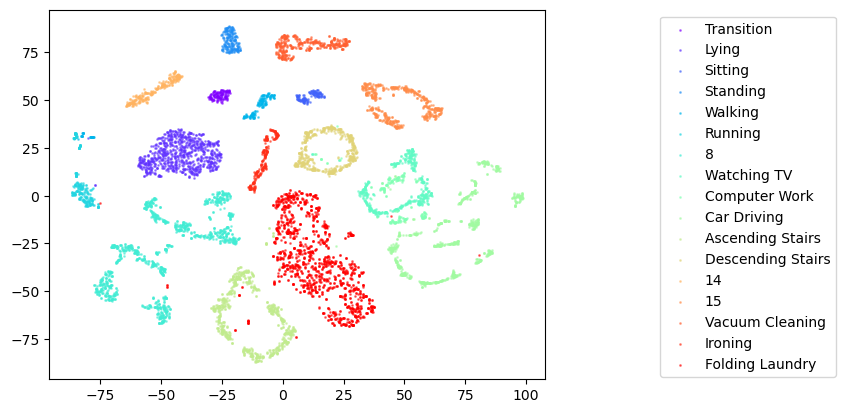

In [29]:
plt.style.use('default')
clustering_output = []
for ts in data_loader:
    recon = deep_cluster_model.AE.encode((ts.float().to(device)))
    clustering_output.append( recon.cpu().detach().numpy() ) 
    

clustering_output = [item for sublist in clustering_output for item in sublist]
?
clustering_output = np.asarray(clustering_output)
clustering_output_f = []
for i,co in enumerate(clustering_output):
    clustering_output[i].flatten()
    clustering_output_f.append(clustering_output[i].flatten())
clustering_output_f = np.asarray(clustering_output_f)

activities = []
activities.append(labels[0])
for l in labels:
    if l != activities[-1]:
        activities.append(int(l))


activity_names = ['sitting',
                 'standing',
                 'lying on back',
                 'lying on side',
                 'ascending stairs',
                 'descending stairs',
                 'standing in elevator',
                 'moving in elevator',
                 'walking in lot',
                 'walking on treadmill flat',
                 'walking on treadmill incline',
                 'running on treadmill',
                 'exercising on stepper',
                 'exercising on cross trainer',
                 'cycling on bike horizontal',
                 'cycling on bike vertical',
                 'rowing',
                 'jumping',
                 'basketball']

X_embedded = TSNE(n_components=2).fit_transform(clustering_output_f)

cmap = plt.get_cmap('rainbow')

l = np.unique(labels)
slicedCM = cmap(np.linspace(0, 1, len(l))) 



for m,la in enumerate(l): 
    ind = np.where(subsequence_labels==la)
    plt.scatter(X_embedded[ind,0],X_embedded[ind,1],color=slicedCM[m], label=activity_names[int(la)], alpha=0.5, s=1)

plt.legend(loc=1, bbox_to_anchor=(1.1, 0., 0.5, 1.0))

## Remove Duplicate Cluster Labels and Set Labels in Sequential Order

In [30]:
while ( (not all(l[i] == l[i+1] -1 for i in range(len(l) - 1))) or (l[0] != 0) ):
    for assignment in range(np.max(cluster_assignments)+1):
        if assignment not in cluster_assignments:
            indx = np.where(cluster_assignments > assignment)
            cluster_assignments[indx] = cluster_assignments[indx]-1
    l = np.unique(cluster_assignments)

## Phase 3: Sldiing Window on Cluster Labels

In [31]:
window_length2 = window_length2
similarities = get_label_score(cluster_assignments, window_length2)


## Normalize and Smooth Sliding Window Distance

In [32]:
data = (similarities - np.min(similarities)) / (np.max(similarities) - np.min(similarities))
data = smooth(np.blackman(50), data)

In [33]:
peaks, peak_data = find_peaks(data, height=0.5,distance=window_length2//2,prominence=0.1)
real_peaks = peaks+window_length2//2
predictions = get_changepoints(real_peaks, window_length, overlap_percent)


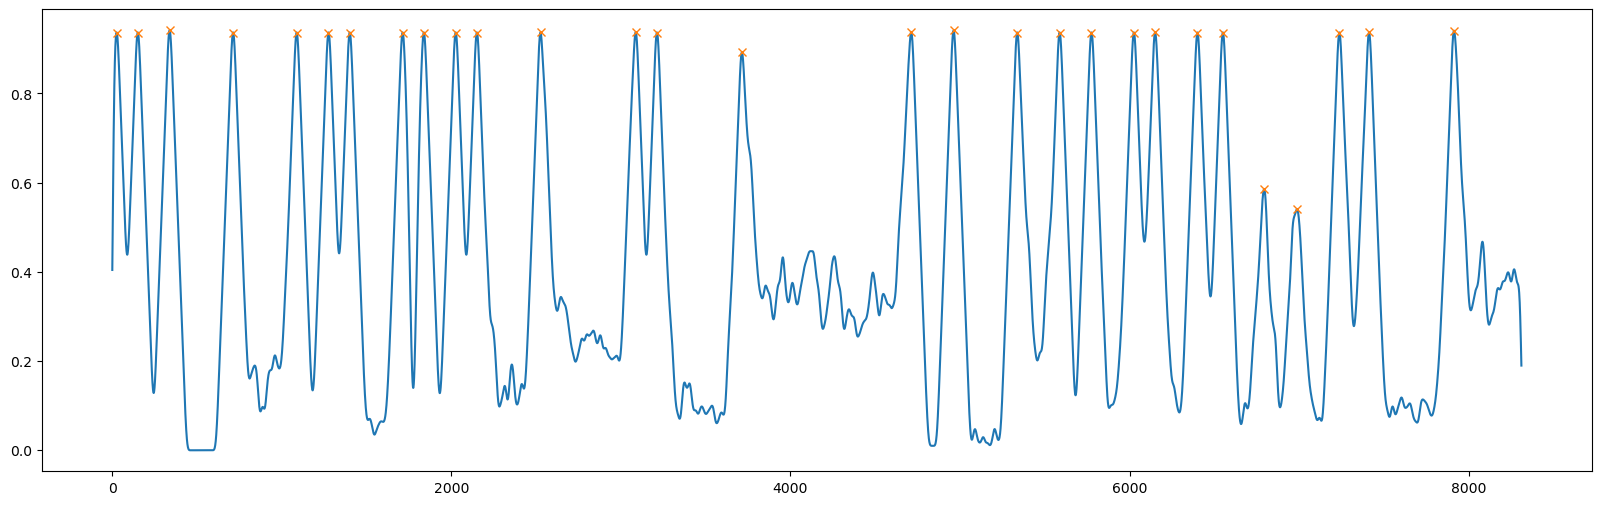

Space: Encoded Hidden Space
Clusters = 100


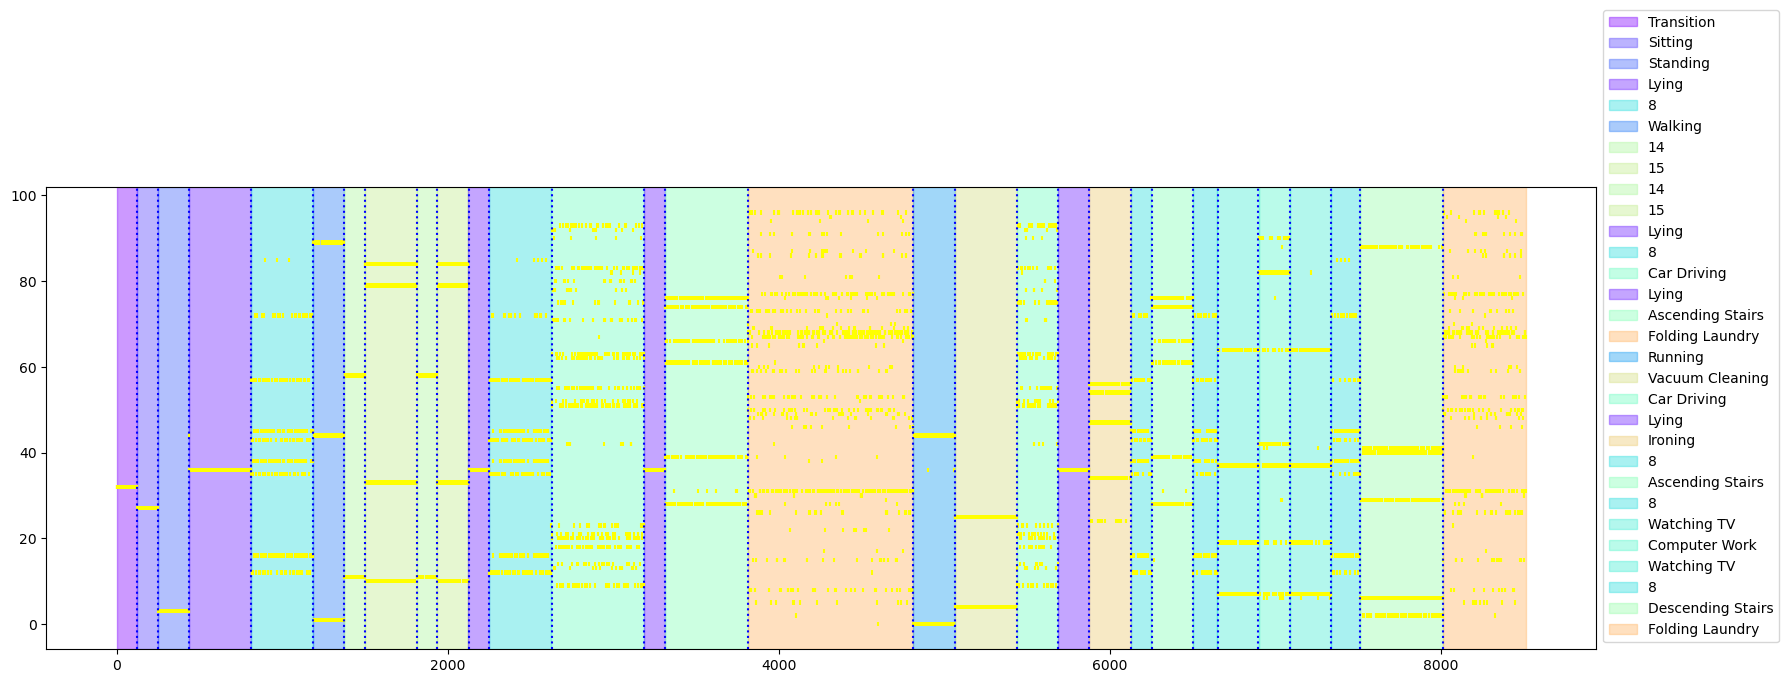

covering score: 0.994419139001385
margin: 200
f_measure score: (1.0, 1.0, 1.0)


In [34]:
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')
cmap = plt.get_cmap('rainbow')

l = np.unique(labels)


slicedCM = cmap(np.linspace(0, 1, len(activity_names))) 


plt.plot(data)
plt.plot(peaks, data[peaks], "x")
plt.show()

positions = np.arange(len(cluster_assignments))[:,np.newaxis]

plt.eventplot(positions, lineoffsets=cluster_assignments, color = [(1.0,1.0,0.0)])

for vline in real_peaks:
    plt.axvline(x = vline, color = 'b', linestyle=':', mfc='b')

start = 0
subsequence_ground_truth = np.where(subsequence_labels[:-1] != subsequence_labels[1:])[0]
print("Space: Encoded Hidden Space\nClusters = {}".format(n_clusters))
for i, activity in enumerate(activities):
    if i == len(activities):
        continue
    if i == len(activities)-1:
        end = len(subsequence_labels)
    else:
        end = subsequence_ground_truth[i]

    plt.axvspan(start, end, alpha=0.4, color=slicedCM[int(activity)], label=activity_names[int(activity)])
    plt.legend(loc=3, bbox_to_anchor=(1, 0, 0, 1.0))
    start = end
plt.show()

print('covering score:',covering(ground_truth, predictions, len(labels)))
margin = 200
print('margin:',margin)
print('f_measure score:',f_measure(ground_truth, predictions, margin=margin, alpha=0.5, return_PR=True))

In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
